In [74]:
import pycatch22
from pathlib import Path
import numpy as np
import torch
import matplotlib.pyplot as plt
import polars as pl
import seaborn as sns

In [3]:
MAIN_PATH = Path("/Users/mds8301/Desktop/temp")
# MAIN_PATH = Path(
# "/home/mds8301/Gaby_raw_data/processed_full_recording_unlabled_data"
# )  # quest
data_path = MAIN_PATH / "dopamine_full_timeseries_array.pt"


In [29]:
data = torch.load(data_path).detach().numpy()
data.shape

(96, 1503463)

In [38]:
d = data[~np.isnan(data[:,0])][:,::100]

In [64]:
X = d[:,1:]
y = d[:,0]
y

array([1., 0., 1., 0., 1., 1., 0., 1., 0., 1., 0., 0., 0., 0., 0., 0., 1.,
       1., 0., 0., 1., 1., 0., 1., 0., 1., 1., 1., 1., 0., 1., 0., 0., 0.,
       1., 0., 0., 1., 1., 1., 0., 1., 0., 0., 1., 0., 1., 0., 1., 0., 1.,
       0., 0., 0., 0., 1., 0., 0., 0., 1., 0., 0., 1., 1., 0., 1., 1., 0.,
       0., 1., 0., 0., 1., 0., 0., 1., 0., 1., 0., 0., 1., 1., 0., 1., 1.,
       0., 0., 0.], dtype=float32)

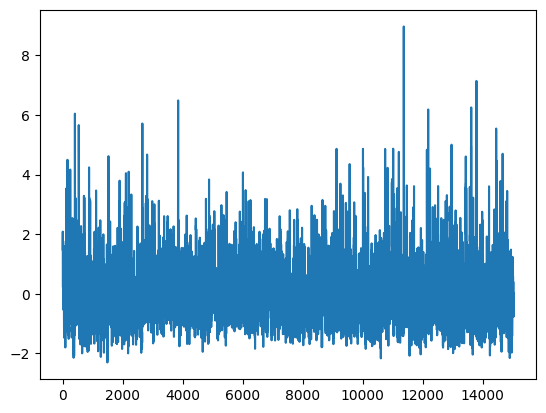

In [44]:
s = d[0][1:]
plt.plot(s)

In [73]:
def get_features(x):
    f = pycatch22.catch22_all(x)
    f_dict = {k:v for k,v in zip(f['names'], f['values'])}
    return pl.DataFrame(f_dict)

f_df = (
    pl.concat([get_features(x) for x in X], how = 'vertical')
    .with_columns(labels = y)
)
f_df


DN_HistogramMode_5,DN_HistogramMode_10,CO_f1ecac,CO_FirstMin_ac,CO_HistogramAMI_even_2_5,CO_trev_1_num,MD_hrv_classic_pnn40,SB_BinaryStats_mean_longstretch1,SB_TransitionMatrix_3ac_sumdiagcov,PD_PeriodicityWang_th0_01,CO_Embed2_Dist_tau_d_expfit_meandiff,IN_AutoMutualInfoStats_40_gaussian_fmmi,FC_LocalSimple_mean1_tauresrat,DN_OutlierInclude_p_001_mdrmd,DN_OutlierInclude_n_001_mdrmd,SP_Summaries_welch_rect_area_5_1,SB_BinaryStats_diff_longstretch0,SB_MotifThree_quantile_hh,SC_FluctAnal_2_rsrangefit_50_1_logi_prop_r1,SC_FluctAnal_2_dfa_50_1_2_logi_prop_r1,SP_Summaries_welch_rect_centroid,FC_LocalSimple_mean3_stderr,labels
f64,f64,f64,i64,f64,f64,f64,f64,f64,i64,f64,f64,f64,f64,f64,f64,f64,f64,f64,f64,f64,f64,f32
-1.176396,-0.613921,3.910483,26,0.133939,0.046344,0.92889,41.0,0.000173,36,0.25851,25.0,0.076923,0.02654,0.091792,0.818734,12.0,1.804634,0.24,0.76,0.23585,0.728927,1.0
-0.193594,-0.60403,4.850241,42,0.137954,0.010718,0.94093,61.0,0.000505,159,0.32975,40.0,0.043478,-0.172077,-0.019689,0.781355,10.0,1.866769,0.46,0.4,0.197884,0.735253,0.0
-1.051671,-0.247603,4.271267,14,0.079847,0.096739,0.938336,43.0,0.028624,20,0.152758,13.0,0.002628,-0.046661,0.160702,0.792258,13.0,1.933451,0.14,0.68,0.242369,0.740342,1.0
-0.191764,-0.526021,5.001063,21,0.236287,0.003304,0.927227,48.0,0.000262,76,0.446824,20.0,0.028986,-0.0587,0.230411,0.837665,12.0,1.752377,0.22,0.12,0.172189,0.678498,0.0
-0.351285,0.028798,4.055852,23,0.154943,0.011412,0.941928,57.0,0.001256,29,0.343124,22.0,0.032787,-0.174172,-0.098776,0.802818,12.0,1.832249,0.16,0.12,0.225112,0.73418,1.0
…,…,…,…,…,…,…,…,…,…,…,…,…,…,…,…,…,…,…,…,…,…,…
0.277033,-0.175526,5.745211,22,0.207039,0.023652,0.921706,60.0,0.001694,48,0.367902,21.0,0.01105,-0.180025,-0.027504,0.873317,13.0,1.741268,0.22,0.16,0.161451,0.630676,1.0
0.183525,-0.385938,6.593021,9,0.103625,0.01917,0.947316,58.0,0.074074,30,0.152421,8.0,0.00041,0.449514,-0.776906,0.771165,11.0,1.90308,0.82,0.68,0.169505,0.733007,1.0
0.276776,-0.871696,6.074086,27,0.234037,0.02278,0.922371,76.0,0.000196,126,0.366877,26.0,0.038462,-0.239856,-0.054477,0.874155,13.0,1.75819,0.32,0.3,0.150714,0.622699,0.0


In [98]:
from sklearn.decomposition import PCA
X = f_df.drop('labels')
pca = PCA(n_components=4)
pca.fit(X)

PCA(n_components=4)

In [99]:
x_pcs = pca.transform(X)

In [100]:
pc_df = (
    pl.DataFrame(
    x_pcs)
    .with_columns(labels = y)
)

<Axes: xlabel='column_0', ylabel='column_1'>

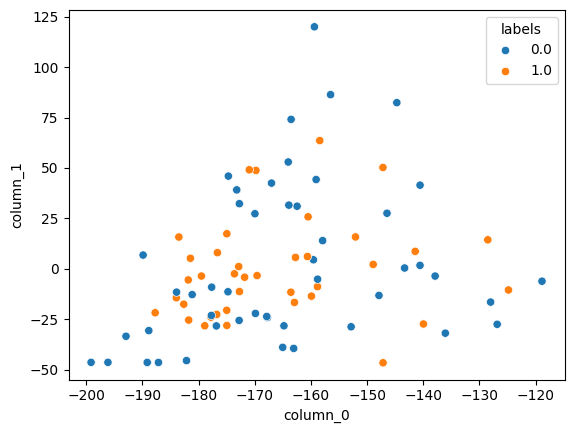

In [101]:
sns.scatterplot(pc_df.filter(pl.col('column_0')<14000), x = "column_0", y = 'column_1', hue = 'labels')